In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
rewards = []
with open('../result_Pd3Ag3Ni3Au3/rewards.txt') as fh:
    for line in fh:
        line = line.strip()
        rewards.append(line)
print(len(rewards))
print(rewards)
print(rewards[0])
print(type(rewards[0]))
print(len(rewards[0]))

tot_rewards = len(rewards[0])
print(tot_rewards)

1
['[-2080.0, -2040.0, -2120.0, -2010.0, -2010.0, -2070.0, -2080.0, -2040.0, -2030.0, -1140.3007304026019, -2020.0, -1108.0394147921152, -2020.0, -1678.9787673688759, -1980.0, -1104.0906915590165, -2020.0, -2050.0, -2170.0, -1927.7385296988589, -2050.0, -2014.6817617693557, -2010.0, -2010.0, -1291.7882945422748, -2020.0, -1914.9366414511871, -2070.0, -2010.0, -2090.0, -2010.0, -2010.0, -1727.7978918981537, -2000.0, -2020.0, -1990.0, -2030.0, -2080.0, -1031.5833667068566, -1193.5797355529876, -2050.0, -2020.0, -2000.0, -2030.0, -2010.0, -1824.6337986744245, -1682.7445026169376, -2010.0, -2010.0, -1990.0, -2020.0, -2090.0, -1520.9451677778331, -2010.0, -2000.0, -2110.0, -1748.1250127282945, -2010.0, -959.0238362884261, -2050.0, -2080.0, -1678.7997981608532, -2050.0, -2100.0, -2000.0, -2020.0, -1980.0, -2010.0, -2070.0, -1861.6818151304067, -2060.0, -2030.0, -2030.0, -1990.0, -1874.1932115550946, -1914.2536660578608, -2060.0, -1767.32506171853, -1868.044265063709, -1918.8843145058456, -19

In [3]:
rewards_list = rewards[0].split('[') #split the left square bracket [
print(rewards_list)
print(rewards_list[0])
print(len(rewards_list))
print(type(rewards_list))

rewards_list =  rewards_list[1].split(']') #split the right square bracket ]
print(rewards_list)
print(rewards_list[0])
print(len(rewards_list))
print(type(rewards_list))

rewards_list =  rewards_list[0].split(',') #split the right square bracket ]
print(rewards_list)
print(rewards_list[-1])
print(len(rewards_list))
print(type(rewards_list))

reward_values = [float(item) for item in rewards_list]
print(reward_values)
print(len(reward_values))

['', '-2080.0, -2040.0, -2120.0, -2010.0, -2010.0, -2070.0, -2080.0, -2040.0, -2030.0, -1140.3007304026019, -2020.0, -1108.0394147921152, -2020.0, -1678.9787673688759, -1980.0, -1104.0906915590165, -2020.0, -2050.0, -2170.0, -1927.7385296988589, -2050.0, -2014.6817617693557, -2010.0, -2010.0, -1291.7882945422748, -2020.0, -1914.9366414511871, -2070.0, -2010.0, -2090.0, -2010.0, -2010.0, -1727.7978918981537, -2000.0, -2020.0, -1990.0, -2030.0, -2080.0, -1031.5833667068566, -1193.5797355529876, -2050.0, -2020.0, -2000.0, -2030.0, -2010.0, -1824.6337986744245, -1682.7445026169376, -2010.0, -2010.0, -1990.0, -2020.0, -2090.0, -1520.9451677778331, -2010.0, -2000.0, -2110.0, -1748.1250127282945, -2010.0, -959.0238362884261, -2050.0, -2080.0, -1678.7997981608532, -2050.0, -2100.0, -2000.0, -2020.0, -1980.0, -2010.0, -2070.0, -1861.6818151304067, -2060.0, -2030.0, -2030.0, -1990.0, -1874.1932115550946, -1914.2536660578608, -2060.0, -1767.32506171853, -1868.044265063709, -1918.8843145058456, -1

In [4]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [5]:
def plot_summary(plotting_values, xlabel, ylabel):
        #plt.figure(figsize=(9, 7.5))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(ylabel+ ' vs. ' + xlabel)
        plt.plot(plotting_values)
        
        window = 25
        if len(plotting_values) > window:
            steps = np.arange(len(plotting_values))
            yMA = movingaverage(plotting_values, window)
            plt.plot(steps[len(steps)-len(yMA):], yMA)
        plt.savefig('../result_Pd3Ag3Ni3Au3/plots/Reward_analysis.png', bbox_inches = 'tight')
        return 

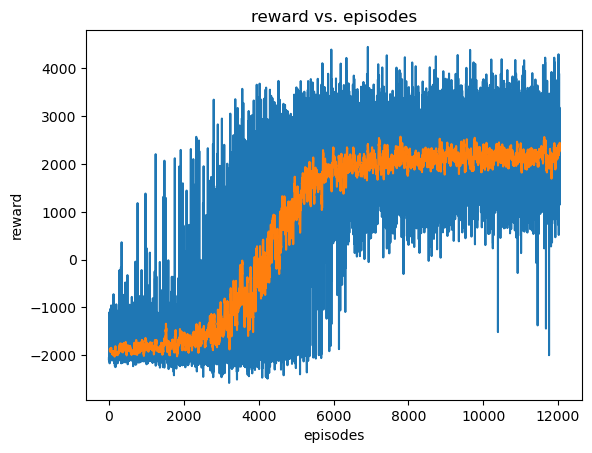

In [6]:
plot_summary(reward_values,  'episodes', 'reward',)

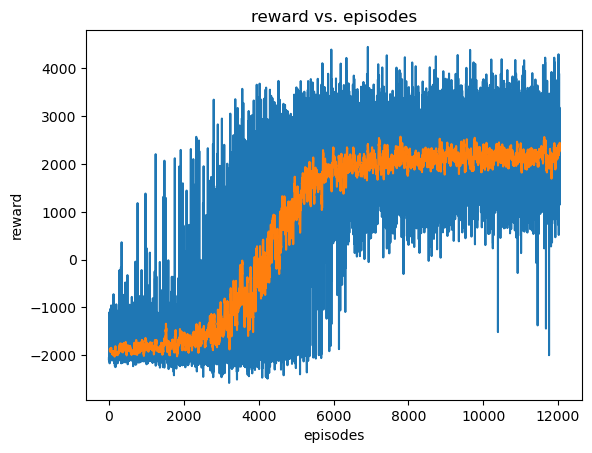

In [7]:
N = 120000
plot_summary(reward_values[:N],  'episodes', 'reward',)

# Reward vs Episode data in excel file

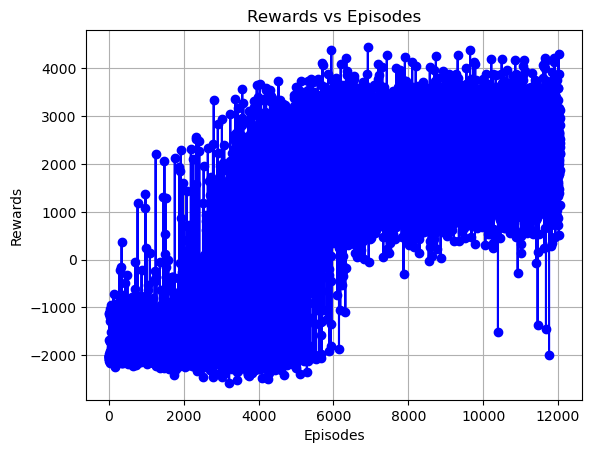

Data saved to ../result_Pd3Ag3Ni3Au3/plots/PdAgNiAu_Rewards.xlsx


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



#### Path to the .txt file containing the reward values



file_path = '../result_Pd3Ag3Ni3Au3/rewards.txt'  # Replace with your actual file path

# Step 1: Read the reward values from the .txt file
with open(file_path, 'r') as f:
    # Read the entire content and clean up unwanted characters
    reward_values = f.read().strip()
    
    # If the file contains square brackets or extra characters, remove them
    reward_values = reward_values.strip('[]')  # Remove leading/trailing brackets if present
    
    # Split by commas to get the reward values as strings
    reward_values = reward_values.split(',')
    
    # Convert the values from strings to floats (use float to handle decimals)
    rewards = list(map(float, reward_values))

# Step 2: Create the episode numbers (1, 2, 3,..., N)
episodes = np.arange(1, len(rewards) + 1)

# Step 3: Plot the rewards vs episodes
plt.plot(episodes, rewards, marker='o', linestyle='-', color='b')  # Plotting in blue

# Add labels and title
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Rewards vs Episodes')

# Show gridlines for better visibility
plt.grid(True)

# Display the plot
plt.show()

# Step 4: Save the data (episodes and rewards) to an Excel file

# Create a pandas DataFrame
df = pd.DataFrame({
    'Episode': episodes,
    'Reward': rewards
})


#### Specify the output file name for the Excel file



output_file = '../result_Pd3Ag3Ni3Au3/plots/PdAgNiAu_Rewards.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(output_file, index=False, engine='openpyxl')

print(f"Data saved to {output_file}")